<a href="https://colab.research.google.com/github/chhaybilindaHak/Assessment/blob/main/W1941231_Coursework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#numpy and pandas will be used for data manipulationh
import numpy as np
import pandas as pd
#matplotib will be used for visually representing our data
import matplotlib.pyplot as plt
#yfinance will be used for importing historical oil prices
import yfinance as yfin

In [2]:
#setting our ticker
ticker = 'AMZN'
ticker = yfin.Ticker(ticker)

#importing our data
data = ticker.history(period='5y')

In [3]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-11-25 00:00:00-05:00,157.093506,159.899994,157.013000,159.253494,75808000,0.0,0.0
2020-11-27 00:00:00-05:00,160.563004,160.809494,159.502502,159.766998,47858000,0.0,0.0
2020-11-30 00:00:00-05:00,160.423996,161.419495,156.277496,158.401993,81278000,0.0,0.0
2020-12-01 00:00:00-05:00,159.425003,162.447495,157.858994,161.003998,90740000,0.0,0.0
2020-12-02 00:00:00-05:00,161.082504,161.600006,158.662994,160.176498,62586000,0.0,0.0
...,...,...,...,...,...,...,...
2025-11-19 00:00:00-05:00,223.740005,223.740005,218.520004,222.690002,58335600,0.0,0.0
2025-11-20 00:00:00-05:00,227.050003,227.410004,216.740005,217.139999,50309000,0.0,0.0
2025-11-21 00:00:00-05:00,216.350006,222.210007,215.179993,220.690002,68490500,0.0,0.0


<Axes: xlabel='Date', ylabel='Amazon'>

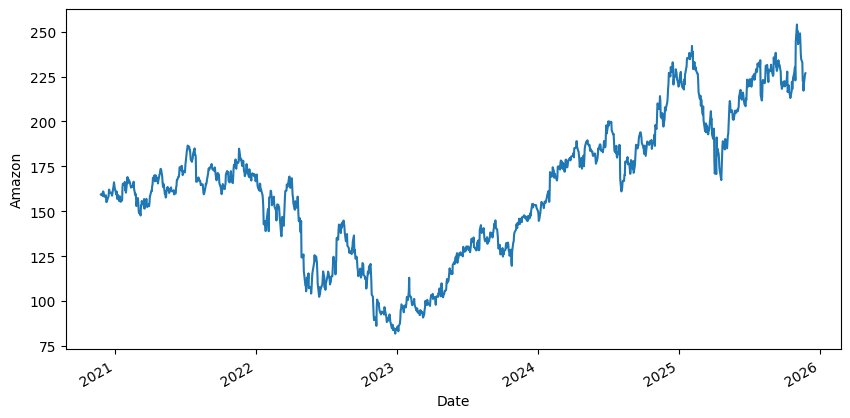

In [4]:
#setting the text on the y-axis
plt.ylabel('Amazon')

#setting the size of our graph
data['Close'].plot(figsize=(10,5))


In [5]:
#calculate simple moving averagee (5MA)
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

#calculate exponential moving averages (EMA)
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

#calculate relative strength indes (RSI)
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSi'] = 100 - (100 / (1 + rs))

data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20,RSi
Date,,,,,,,,,,,
2020-11-25 00:00:00-05:00,157.093506,159.899994,157.013000,159.253494,75808000,0.0,0.0,NaN,NaN,159.253494,NaN
2020-11-27 00:00:00-05:00,160.563004,160.809494,159.502502,159.766998,47858000,0.0,0.0,NaN,NaN,159.302399,NaN
2020-11-30 00:00:00-05:00,160.423996,161.419495,156.277496,158.401993,81278000,0.0,0.0,NaN,NaN,159.216646,NaN
2020-12-01 00:00:00-05:00,159.425003,162.447495,157.858994,161.003998,90740000,0.0,0.0,NaN,NaN,159.386870,NaN
2020-12-02 00:00:00-05:00,161.082504,161.600006,158.662994,160.176498,62586000,0.0,0.0,NaN,NaN,159.462073,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-11-19 00:00:00-05:00,223.740005,223.740005,218.520004,222.690002,58335600,0.0,0.0,236.597501,228.1728,234.090739,49.889050
2025-11-20 00:00:00-05:00,227.050003,227.410004,216.740005,217.139999,50309000,0.0,0.0,236.400001,227.9166,232.476383,27.730263
2025-11-21 00:00:00-05:00,216.350006,222.210007,215.179993,220.690002,68490500,0.0,0.0,236.224001,227.7674,231.353870,19.479574


In [6]:
# Dropping the NaN values
data = data.dropna()

In [7]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20,RSi
Date,,,,,,,,,,,
2021-02-08 00:00:00-05:00,167.925003,168.250000,165.199997,166.147003,65148000,0.0,0.0,162.385099,160.74137,163.689976,64.976296
2021-02-09 00:00:00-05:00,165.624496,166.899994,164.891998,165.250000,44070000,0.0,0.0,162.862074,160.86130,163.838550,53.781422
2021-02-10 00:00:00-05:00,165.699997,165.897507,162.699997,164.328995,63032000,0.0,0.0,163.276449,160.95254,163.885259,48.056659
2021-02-11 00:00:00-05:00,164.600006,164.600006,162.403000,163.106506,46028000,0.0,0.0,163.517049,161.04663,163.811092,47.185990
2021-02-12 00:00:00-05:00,162.500000,164.012497,161.665497,163.885498,46706000,0.0,0.0,163.892649,161.10426,163.818178,48.515395
...,...,...,...,...,...,...,...,...,...,...,...
2025-11-19 00:00:00-05:00,223.740005,223.740005,218.520004,222.690002,58335600,0.0,0.0,236.597501,228.17280,234.090739,49.889050
2025-11-20 00:00:00-05:00,227.050003,227.410004,216.740005,217.139999,50309000,0.0,0.0,236.400001,227.91660,232.476383,27.730263
2025-11-21 00:00:00-05:00,216.350006,222.210007,215.179993,220.690002,68490500,0.0,0.0,236.224001,227.76740,231.353870,19.479574


In [8]:
# Initialising X and assigning the two feature variables
X = data[['EMA_20','SMA_50']]

# Getting the head of the data
X.head()

,EMA_20,SMA_50
Date,,
2021-02-08 00:00:00-05:00,163.689976,160.74137
2021-02-09 00:00:00-05:00,163.838550,160.86130
2021-02-10 00:00:00-05:00,163.885259,160.95254
2021-02-11 00:00:00-05:00,163.811092,161.04663
2021-02-12 00:00:00-05:00,163.818178,161.10426


In [9]:
# Setting-up the dependent variable
y = data['Close']

# Getting the head of the data
y.head()

,Close
Date,
2021-02-08 00:00:00-05:00,166.147003
2021-02-09 00:00:00-05:00,165.250000
2021-02-10 00:00:00-05:00,164.328995
2021-02-11 00:00:00-05:00,163.106506
2021-02-12 00:00:00-05:00,163.885498


In [10]:
# Setting the training set to 80% of the data
training = 0.7
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [11]:
X[:t]

,EMA_20,SMA_50
Date,,
2021-02-08 00:00:00-05:00,163.689976,160.741370
2021-02-09 00:00:00-05:00,163.838550,160.861300
2021-02-10 00:00:00-05:00,163.885259,160.952540
2021-02-11 00:00:00-05:00,163.811092,161.046630
2021-02-12 00:00:00-05:00,163.818178,161.104260
...,...,...
2024-06-10 00:00:00-04:00,182.609401,182.660201
2024-06-11 00:00:00-04:00,183.049458,182.785400
2024-06-12 00:00:00-04:00,183.415224,182.909400


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)

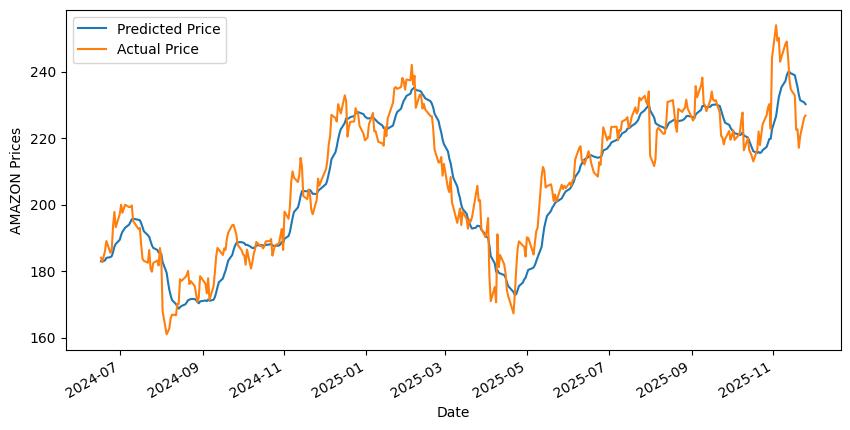

In [13]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("AMAZON Prices")
plt.show()

In [14]:
# Computing the accuracy of our model
R_squared_score =model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 89.10% accuracy.


In [15]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2.9629139882657114
betas = [ 1.51486267 -0.53559159]
